# Applied Machine Learning (2023), exercises


## General instructions for all exercises

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Remove also line 

> raise NotImplementedError()

**Do not change other areas of the document**, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manually graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks are text in markdown format. It may contain text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, validate and submit your solution using the nbgrader tools from the `Nbgrader/Assignment List`-menu.


## Neural Networks

## This exercise is optional
If you decide to do this, write in the following cell, which of the exercises 1-9 you want to replace with this one.

1

The following code creates a data set is a 3D data set of values in design matrix X and corresponding ground truth in vector y.

In [1]:
##>>> Some code for bootstrap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn import datasets 
from mpl_toolkits.mplot3d import Axes3D

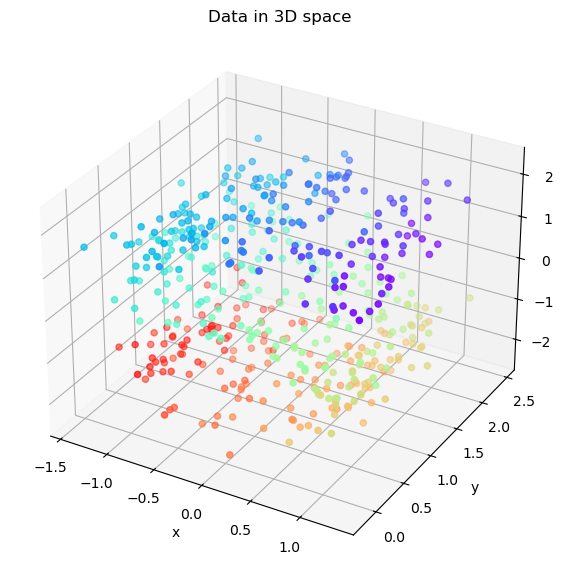

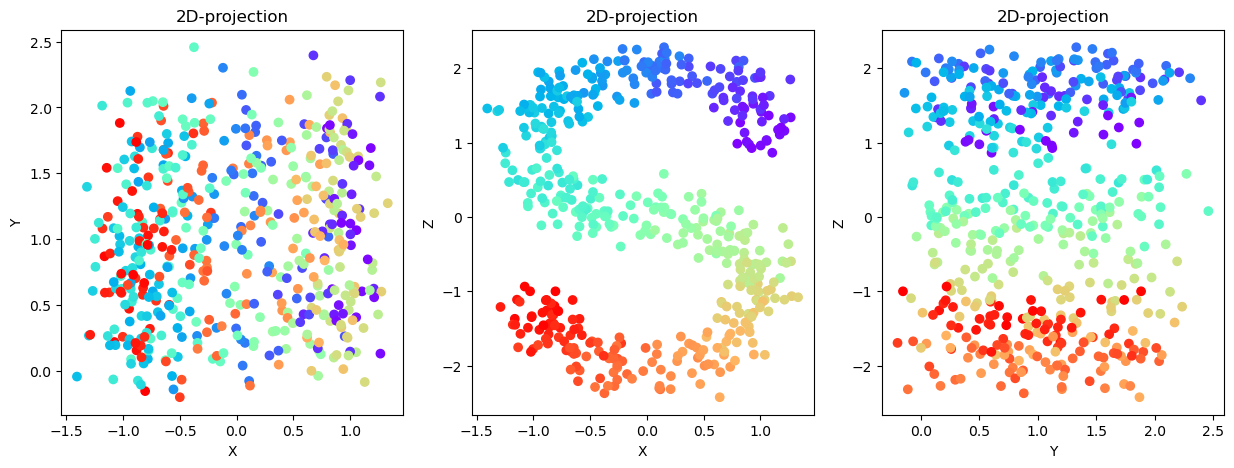

In [2]:
X,y=datasets.make_s_curve(n_samples=500, noise=0.2, random_state=0)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='rainbow')
ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
plt.title('Data in 3D space')

fig,axs=plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axs[0].scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
axs[1].scatter(X[:,0], X[:,2], c=y, cmap='rainbow')
axs[2].scatter(X[:,1], X[:,2], c=y, cmap='rainbow')

for i in range(3):
    axs[i].set_title('2D-projection')
    axs[i].set_xlabel("XXY"[i])
    axs[i].set_ylabel("YZZ"[i])

### Task 1: MLPRegressor (3 points)

Implement a `MLPRegressor` to predict `y` using data in `X`. Try different number of hidden layers and number of perceptrons in the hidden layer to reach good prediction accuracy measured by `r2_score` and `cross_val_score`. Avoid too high complexity so that prediction in the training set would be significantly better than in the cross-validation set.   

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_s_curve

In [35]:
#GENERATE S-CURVE FROM DATASET
X, y = make_s_curve(n_samples=1000, noise=0.1, random_state=42)

#SINCE y IS A 2D ARRAY FOR THE S-CURVE, IT HAS TO BE FLATTENED FOR THE REGRESSION
y = np.ravel(y)

#STANDARDIZE THE FEATURES
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#SPLIT THE DATA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#DEFINE AND TRAIN THE MLPRegressor
hidden_layer_sizes = (150, 100, 50)  
mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation='relu', solver='adam', alpha=0.0001, max_iter=5000, random_state=42)

#FIT TO THE MODEL
mlp.fit(X_train, y_train)

#EVALUATE THE MODEL
accuracy_train = r2_score(y_train, mlp.predict(X_train))
accuracy_test = r2_score(y_test, mlp.predict(X_test))
accuracy_cv = cross_val_score(mlp, X, y).mean()

#RESULTS
print("R2 Score on Training Set: ", accuracy_train)
print("R2 Score on Test Set: ", accuracy_test)
print("Cross-Validation Scores: ", accuracy_cv)

R2 Score on Training Set:  0.9979524728707627
R2 Score on Test Set:  0.9969240295348695
Cross-Validation Scores:  0.9978760258636944


In [ ]:
if 'predictor' not in globals():
    print("Use name predictor for MLPRegressor object, please.")
assert(accuracy>0.95)
assert(accuracy_cv>0.93)
assert(type(predictor)==MLPRegressor)

## Task 2: Compare with Other regressor (3 points)

Select some other suitable regressor, and compare it's accuracy with `MPLRegerssor`. Try to avoid overfitting.

In [34]:
from sklearn.ensemble import ExtraTreesRegressor

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#SPLIT THE DATA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

#IMPLEMENT TO MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
accuracy = r2_score(y_test, mlp.predict(X_test_scaled))
accuracy_cv = cross_val_score(mlp, X_train_scaled, y_train, cv=5).mean()

#EXTRA 
et = ExtraTreesRegressor(random_state=42)
et.fit(X_train, y_train)
accuracy2 = r2_score(y_test, et.predict(X_test))
accuracy_cv2 = cross_val_score(et, X_train, y_train, cv=5).mean()

#PRINT RESULTS
print("Prediction accuracy is", accuracy, accuracy2)
print("Prediction accuracy cv is ", accuracy_cv, accuracy_cv2)

Prediction accuracy is 0.9906878738598174 0.9987221173991145
Prediction accuracy cv is  0.9914169576405192 0.9981735455681129


In [ ]:
if 'predictor2' not in globals():
    print("Use name predictor2 for Extratreesegressor object, please.")
assert(type(predictor2)==ExtraTreesRegressor)


In [40]:
import time

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled, X_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

#IMPLELEMT WITH TRAINING TIME
start_time = time.time()
mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp_training_time = time.time() - start_time
accuracy = r2_score(y_test, mlp.predict(X_test_scaled))
accuracy_cv = cross_val_score(mlp, X_train_scaled, y_train, cv=5).mean()

#IMPLEMENT EXTRATREESREGESSOR WITH TRAINING TIME MEASUREMENT
start_time = time.time()
et = ExtraTreesRegressor(random_state=42)
et.fit(X_train, y_train)
et_training_time = time.time() - start_time
accuracy2 = r2_score(y_test, et.predict(X_test))
accuracy_cv2 = cross_val_score(et, X_train, y_train, cv=5).mean()

#PRINT RESULTS
print("MLPRegressor - Prediction accuracy: {}, CV accuracy: {}, Training time: {} seconds".format(accuracy, accuracy_cv, mlp_training_time))
print("ExtraTreesRegressor - Prediction accuracy: {}, CV accuracy: {}, Training time: {} seconds".format(accuracy2, accuracy_cv2, et_training_time))

MLPRegressor - Prediction accuracy: 0.9906878738598174, CV accuracy: 0.9914169576405192, Training time: 1.9643852710723877 seconds
ExtraTreesRegressor - Prediction accuracy: 0.9987221173991145, CV accuracy: 0.9981735455681129, Training time: 0.2156233787536621 seconds


## Task 3 (4 points)

- Compare the performance of two regressors
  - Accuracies
  - Training time
  - Prediction time (you may speculate this theoretically, or try to measure)
- Do you think Ridge regression, Lasso or Elastic net would work in this case? Why/WHy not?

#The accuracies were almost the same with implementation of extra trees and accuracy was really high_time, et_predict_time))

#Training time was also similar WITH MPLregressor almos 2 seconds and with extra trees little bit over 2

#Prediction time would be the same I assume concidering the training times

#Ridge would be good to handle multicollineality and when the most variables are relevant

#Lasso adds a penalty equal to the absolute value of the magnitude of coefficients. This can lead to some coefficients being shrunk to zero, effectively performing feature selection.

#Elastic Net can be particularly effective when there are multiple correlated features.